## Ramon Brand - Session 6 - RNN and Embedding
### Overview
The idea of this exercise is to train a neural network by using text word embedding. We will then go further and implement the network with additional RNN layers.

In [11]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dropout
from keras import preprocessing

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=1000)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=1000)

one_hot_train_labels = to_categorical(y_train)
y_test = to_categorical(y_test)

x_val = x_train[:500]
partial_x_train = x_train[500:]

y_val = one_hot_train_labels[:500]
partial_y_train = one_hot_train_labels[500:]

print("Validation shape: ", x_val.shape)
print("Validation result shape: ", y_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

model = models.Sequential()

model.add(Embedding(10000, 48, input_length=1000))
model.add(Flatten())

model.add(layers.Dense(82, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])


Validation shape:  (500, 1000)
Validation result shape:  (500, 46)
Test shape:        (2246, 1000)
Test result shape: (2246, 46)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1000, 48)          480000    
_________________________________________________________________
flatten_7 (Flatten)          (None, 48000)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 82)                3936082   
_________________________________________________________________
dropout_13 (Dropout)         (None, 82)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                5312      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_____________

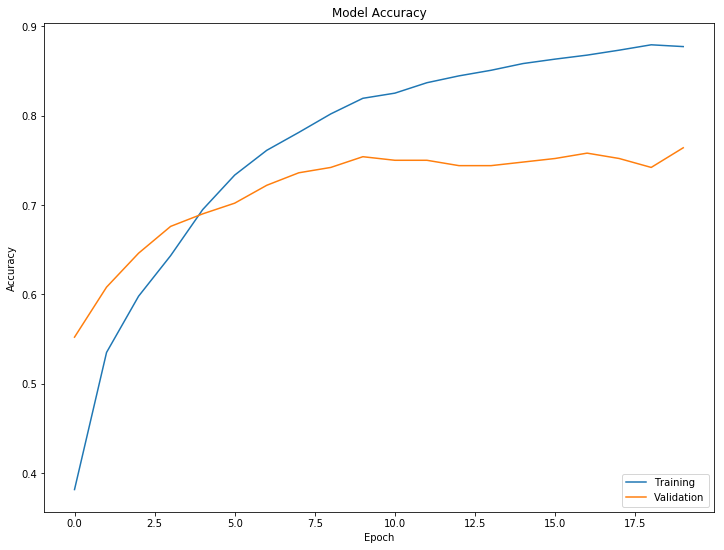

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

The accuracy we got was only 0.72, which is not great. Let's see if we can imporve the accuracy by using a RNN.

In [3]:
import numpy as np
import keras
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Flatten, Embedding, Dropout, LSTM, SimpleRNN
from keras import preprocessing

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=1000)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=1000)

one_hot_train_labels = to_categorical(y_train)
y_test = to_categorical(y_test)

x_val = x_train[:500]
partial_x_train = x_train[500:]

y_val = one_hot_train_labels[:500]
partial_y_train = one_hot_train_labels[500:]

print("Validation shape: ", x_val.shape)
print("Validation result shape: ", y_val.shape)
print("Test shape:       ", x_test.shape)
print("Test result shape:", y_test.shape)

model = models.Sequential()

model.add(Embedding(10000, 46))
model.add(SimpleRNN(46))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])


Validation shape:  (500, 1000)
Validation result shape:  (500, 46)
Test shape:        (2246, 1000)
Test result shape: (2246, 46)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 46)          460000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 46)                4278      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2162      
Total params: 466,440
Trainable params: 466,440
Non-trainable params: 0
_________________________________________________________________
Train on 8482 samples, validate on 500 samples
Epoch 1/5
8482/8482 [==============================] - 109s 13ms/step - loss: 2.4137 - acc: 0.3645 - val_loss: 2.3400 - val_acc: 0.3480
Epoch 2/5
8482/8482 [==============================] - 108s 13ms/step - loss: 1.9774 - a

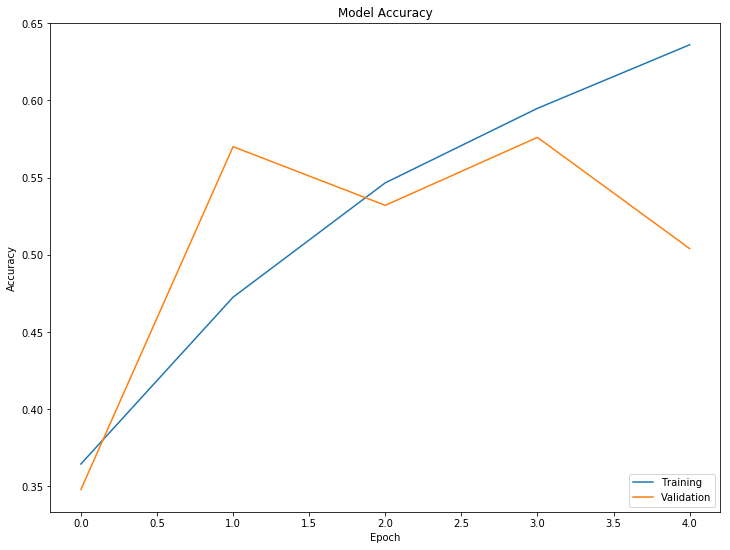

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
plt.plot(history.history["acc"])
plt.plot(history.history['val_acc'])
#plt.xlim([5,50])
#plt.ylim([0.75,0.94])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")
plt.show()

Something is significantly wrong with the computation. The above model took over an hour per epoch with a SimpleRNN layer, and over 2 hours per epoch with a LSTM layer.

My system is realatively performant, and has had no issues with previous networks. I have also had many issues with tensorflow, and countless Blas Error's, which I believe refer to the connection between tensorflow and the CUDA library.

Some networks would train in a 2 minutes, and then without changing a single line of code, just rerunning it, would essentially freeze the system.

Even so, after a very long time, we managed to get an accuracy of 0.49... Not great.